# Homework 9
## Problem 2.1
When the feed is $67$% vapor (mol basis) determine composition at which the q line intersects the EQ curve.

Starting with mole balances on the whole system and on the light key,
$$
zF = x_DD+x_BB \tag{1}
$$
and
$$
F = B+D\tag{2}
$$
The flow rate of the exits can be determined. To solve these equations, I will use the feed molar flow rate which I calculated in problem 1.4 to be about $528.634\frac{mol}{hr}$.

The equation for the q line is found by,
$$
y = \frac{q}{q-1}x-\frac{z}{q-1}\tag{3}
$$
where
$$
q = \frac{L_F}{F} = 1-\frac{V_F}{F} = 1-\frac{D}{F}\tag{4}
$$

After using ([1](#mjx-eqn-1)), ([2](#mjx-eqn-2)), and ([4](#mjx-eqn-4)) to get $q$ then ([3](#mjx-eqn-3)) can be used to find the intersection with the EQ curve.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [2]:
file = pd.read_csv('Txy.csv')                       #data from csv
temp = file['T'].values
x = file['x'].values
y = file['y'].values

xInterp = interp1d(y,x)                             #interpolated data
yInterp = interp1d(x,y)

z = .5                                              #feed comp molfrac
F = 45                                              #feed kg/hr
xD = .85                                            #molfrac distil
xB = .1                                             #molfrac bott

Fmol = 528.634                                      #mol basis feed

In [3]:
def DB(DB):                                                              #solving eq 1 and 2
    return [z*Fmol-xD*DB[0]-xB*DB[1],Fmol-DB[0]-DB[1]]

roots = fsolve(DB,[1,1])                                                 # solve for D,B
D = roots[0]                                                            #distil
B = roots[1]                                                            #bott
q = 1-D/Fmol   

def qline(x):                                                           # eq for qline
    return (q/(q-1))*x-z/(q-1)

def eqIntersect(x):                                                     #solve for intersect
    return [qline(x[0])-x[1],yInterp(x[0])-x[1]]

intersectRoots = fsolve(eqIntersect,[.4,.4])
print(intersectRoots)

[0.38560775 0.60009322]


The q line and EQ curve intersect at $(0.386,0.600)$

''

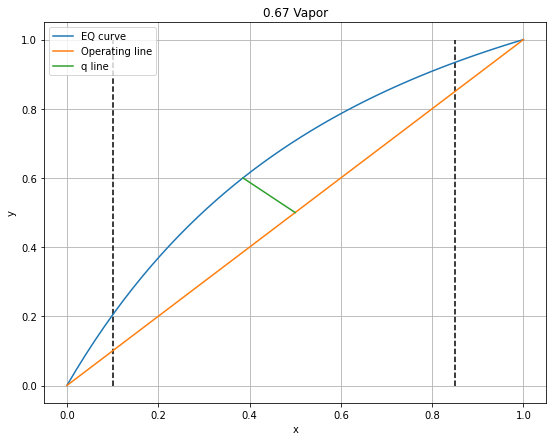

In [4]:
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')
plt.plot(x,x,label='Operating line')
plt.plot([intersectRoots[0],z],[intersectRoots[1],z],label='q line')
plt.vlines(xD,0,1,'k','--')
plt.vlines(xB,0,1,'k','--')

plt.grid()
plt.title('0.67 Vapor')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
;

## Problem 2.2
Determine the minimum reflux ratio.

$R_{min}$ is found using the same process as problem 1.2. The rectifying op line is drawn from the intersection of the q line and EQ curve to the $45\degree$ line at the distillate composition. The slope is $(\frac{L}{V})_{min}$ and can be used to solve for $R_{min}$ using the following relationship
$$
R_{min} = \frac{(\frac{L}{V})_{min}}{1-(\frac{L}{V})_{min}} \tag{5}
$$

''

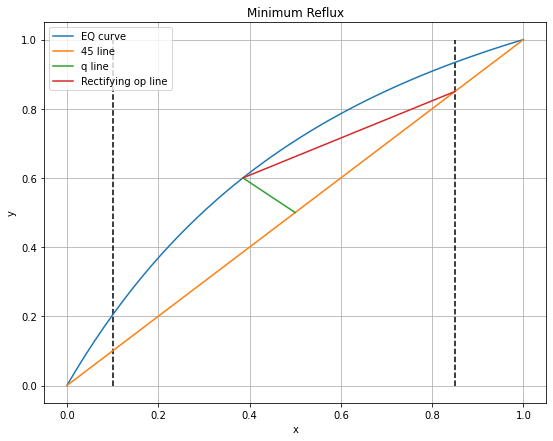

In [5]:
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')                                                              #eq
plt.plot(x,x,label='45 line')                                                        #45
plt.plot([intersectRoots[0],z],[intersectRoots[1],z],label='q line')                        #q 
plt.plot([intersectRoots[0],xD],[intersectRoots[1],xD],label='Rectifying op line')          #rect op
plt.vlines(xD,0,1,'k','--')
plt.vlines(xB,0,1,'k','--')

plt.grid()
plt.title('Minimum Reflux')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
;

In [6]:
mRectMin = (xD-intersectRoots[1])/(xD-intersectRoots[0])
Rmin = mRectMin/(1-mRectMin)
print(Rmin)

1.1651454551332954


$R_{min}=1.17$

## Problem 2.3
When $R=3R_{min}$ determine the number of equilibrium stages required and the placement of the feed stage.

This problem is solved using the same process as problem 1.3. The slope of the rectifying op line can be found by the given R value and the stripping op line connects the composition at the bottoms to the intersection of the q line and rectifying op line. The stages can then be drawn in and counted. The feed stage will be on teh equilibrium stage closest to the intersection of the op lines and q line.

In [7]:
R = 3*Rmin                                              #reflux
mRect = R/(R+1)                                         #slope from reflux

def rect(x):                                            #rect op line
    b = xD-xD*mRect
    return mRect*x+b

def qFlux(x):                                           #intersect q and rect op
    return [rect(x[0])-x[1],qline(x[0])-x[1]]
qFluxRoots = fsolve(qFlux,[1,1])

mStrip = (qFluxRoots[1]-xB)/(qFluxRoots[0]-xB)          #use rect op line to find slope of strip op line

def strip(x):                                           #op line strip
    b = xB-xB*mStrip
    return mStrip*x+b

''

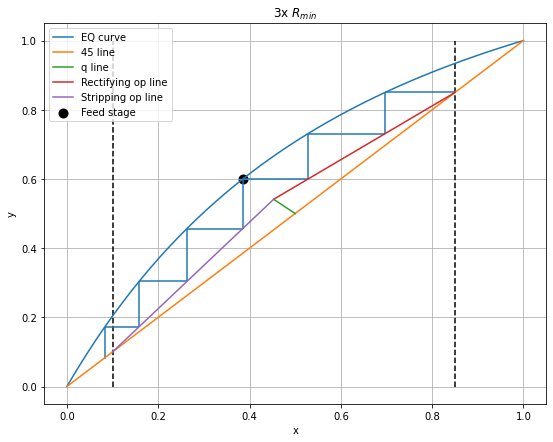

In [8]:
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')                                                      #eq
plt.plot(x,x,label='45 line')                                                #45
plt.plot([qFluxRoots[0],z],[qFluxRoots[1],z],label='q line')                        #q
plt.plot([qFluxRoots[0],xD],[qFluxRoots[1],xD],label='Rectifying op line')          #rect
plt.plot([xB,qFluxRoots[0]],[xB,qFluxRoots[1]],label='Stripping op line')           #strip
plt.vlines(xD,0,1,'k','--')
plt.vlines(xB,0,1,'k','--')


x1 = xD                                                     #stages
y1 = xD
x2 = xInterp(y1)
y2 = rect(x2)
x3 = xInterp(y2)
y3 = rect(x3)
x4 = xInterp(y3)
y4 = strip(x4)
x5 = xInterp(y4)
y5 = strip(x5)
x6 = xInterp(y5)
y6 = strip(x6)
x7 = xInterp(y6)
y7 = strip(x7)
x8 = xInterp(y7)

plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y2)
plt.hlines(y2,x2,x3)
plt.vlines(x3,y2,y3)
plt.hlines(y3,x3,x4)
plt.vlines(x4,y3,y4)
plt.hlines(y4,x4,x5)
plt.vlines(x5,y4,y5)
plt.hlines(y5,x5,x6)
plt.vlines(x6,y5,y6)
plt.hlines(y6,x6,x7)
plt.vlines(x7,y6,y7)
plt.scatter(x4,y3,color='k',linewidths=4,label='Feed stage')                #feed
plt.grid()
plt.title(''.join(['3x ',r'$R_{min}$']))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
;

$6$ equilibrium stages are needed and the feed stage placement is shown on the above plot to be on stage $3$.